## Agoda  Linear Regression Model 
----------

Steps :
- Import Dataset 
- Cleaning 
- Define x , y
- Split Dataset [training - test]
- build and train model 
- predict the test data
- evaluate model 

## import Libraries

In [83]:
# import Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Load Dataset
df = pd.read_csv('rooms.csv')

## Gather Information From Data

In [85]:
df.shape

(2247, 6)

------
### Data Cleaning 

In [86]:
# take alook 
df.head(10)

,name,price,type,bedroom_count,bed_count,review_count
0,DOYANEN HOTELS YAMATO,18,Entire apartment,1,1,881
1,PG Kuromon,35,Entire apartment,1,1,"1,238"
2,Bon Condo Namba Nipponbashi,42,Entire apartment,1,3,196
3,Sakura Sands Hotel,32,Good,Price per night as low as,+ FREE CANCELLATION,NaN
4,USJまで2駅 懐かしファミコンでスーパーマリオと過ごすお部屋 in Sakura ...,73,Entire apartment,1,3,16
5,502室難波日本橋60平方広さ快適洗練された空間和風部屋,43,Entire apartment,3,6,2
6,Bon Condo Umeda East,NaN,Entire apartment,130 reviews,JUST MISSED IT!,NaN
7,Ocean OTR Park View Bentencho,31,Entire apartment,1,2,333
8,LAND MARK NAMBA G,43,Entire apartment,Highlights,1,Price per night as low as
9,HOTEL AARON Tsuten East,20,Entire apartment,1,2,3


In [87]:
df.sample(15,random_state=10)

,name,price,type,bedroom_count,bed_count,review_count
1438,Summer Suites Studios,NaN,Entire apartment,771 reviews,JUST MISSED IT!,NaN
1557,EightyOne Newport Boulevard Condotel CLUSTER 1-7N,39,Entire apartment,Highlights,1,Exceptional
216,Back Kuromon Ichiba AFP Apartment(61),33,Entire apartment,Highlights,2,Awaiting
176,seadream tsurumi by yokotani kikaku No.3,31,Entire apartment,Highlights,1,Awaiting
1747,Honeymoon Business Queen Suite33C,52,Entire apartment,Highlights,1,Exceptional
1417,M City Lake View 1+1 Room,61,Entire apartment,2,4,4
603,7mins to Shibuya station/Romantic Room / Room No1,159,Entire apartment,Highlights,1,Good
1035,Designer Arte Plus Studio w Netflix IdealHub 02,27,Entire apartment,Highlights,1,Excellent
1050,Comfort Service Apartment at The Face KLCC,53,Entire apartment,1,1,14
1640,Extremeli Suites,NaN,Very good,JUST MISSED IT!,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2247 non-null   object
 1   price          2000 non-null   object
 2   type           2247 non-null   object
 3   bedroom_count  2246 non-null   object
 4   bed_count      2181 non-null   object
 5   review_count   1780 non-null   object
dtypes: object(6)
memory usage: 105.5+ KB


In [89]:
df.dtypes

name             object
price            object
type             object
bedroom_count    object
bed_count        object
review_count     object
dtype: object

---------

In [90]:
# check for null values 
df.isnull().sum()

name               0
price            247
type               0
bedroom_count      1
bed_count         66
review_count     467
dtype: int64

# convert column types

In [91]:
df['review_count']  = pd.to_numeric(df['review_count'], errors='coerce')
df['bedroom_count']  = pd.to_numeric(df['bedroom_count'], errors='coerce')
df['bed_count']  = pd.to_numeric(df['bed_count'], errors='coerce')
df['price']  = pd.to_numeric(df['price'], errors='coerce')

In [92]:
df.isnull().sum()

name                0
price             257
type                0
bedroom_count    1481
bed_count         486
review_count     1769
dtype: int64

In [93]:
df.sample(10,random_state=10)

,name,price,type,bedroom_count,bed_count,review_count
1438,Summer Suites Studios,NaN,Entire apartment,NaN,NaN,NaN
1557,EightyOne Newport Boulevard Condotel CLUSTER 1-7N,39.0,Entire apartment,NaN,1.0,NaN
216,Back Kuromon Ichiba AFP Apartment(61),33.0,Entire apartment,NaN,2.0,NaN
176,seadream tsurumi by yokotani kikaku No.3,31.0,Entire apartment,NaN,1.0,NaN
1747,Honeymoon Business Queen Suite33C,52.0,Entire apartment,NaN,1.0,NaN
1417,M City Lake View 1+1 Room,61.0,Entire apartment,2.0,4.0,4.0
603,7mins to Shibuya station/Romantic Room / Room No1,159.0,Entire apartment,NaN,1.0,NaN
1035,Designer Arte Plus Studio w Netflix IdealHub 02,27.0,Entire apartment,NaN,1.0,NaN
1050,Comfort Service Apartment at The Face KLCC,53.0,Entire apartment,1.0,1.0,14.0
1640,Extremeli Suites,NaN,Very good,NaN,NaN,NaN


# deal with null values

In [94]:
 
df['bedroom_count'].fillna(df['bedroom_count'].mode()[0], inplace=True)
df['bed_count'].fillna(df['bed_count'].mode()[0], inplace=True)
df['review_count'].fillna(df['review_count'].mode()[0], inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

In [95]:
df.isnull().sum()

name             0
price            0
type             0
bedroom_count    0
bed_count        0
review_count     0
dtype: int64

In [96]:
df.dtypes

name              object
price            float64
type              object
bedroom_count    float64
bed_count        float64
review_count     float64
dtype: object

-------
# Take Alook 

In [97]:
df.sample(10)

,name,price,type,bedroom_count,bed_count,review_count
1796,R & E Suites Room 1,35.0,Entire apartment,1.0,1.0,1.0
1540,Mezza II Residences Unit # 4133,24.0,Entire apartment,1.0,1.0,1.0
934,"The Duplex Getaway @ Tamarind Suites, Wifi Net...",45.0,Entire apartment,1.0,1.0,1.0
1781,GR1 Grace Condo Deluxe Suites @ Taguig Near BGC,45.0,Entire apartment,1.0,1.0,1.0
502,shinjuku kabukicho #601,65.0,Entire apartment,1.0,1.0,1.0
2085,Comfortable 1 bedroom stay in Subang Jaya,45.0,Entire apartment,1.0,1.0,1.0
953,D'majestic Place By Homes Asian 03,21.0,Entire apartment,1.0,1.0,4.0
1773,[hiii]Naranja|Robinson|RoxasBLVD/PoolSunset-MN...,28.0,Entire apartment,1.0,1.0,1.0
1160,"Montana Suite 2, Empire Damansara",40.0,Entire apartment,1.0,2.0,1.0
563,Akabane TK Building 301,53.0,Entire apartment,1.0,3.0,11.0


#  drop unnecessry columns 

In [98]:
df.drop('name', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)

In [99]:
df.shape

(2247, 4)

In [100]:
df.describe()

,price,bedroom_count,bed_count,review_count
count,2247.000000,2247.000000,2247.000000,2247.000000
mean,62.451713,1.104584,1.697819,11.959057
std,70.670376,0.399478,1.302067,65.225509
min,5.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,1.000000,1.000000
50%,45.000000,1.000000,1.000000,1.000000
75%,63.000000,1.000000,2.000000,1.000000
max,782.000000,4.000000,18.000000,988.000000


------
## deal with outlier 

<AxesSubplot:xlabel='price', ylabel='Density'>

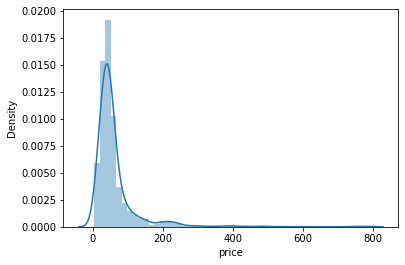

In [101]:
sns.distplot(df['price'])

In [102]:
q = df['price'].quantile(0.99)
df = df[df['price']<q]

<AxesSubplot:xlabel='price', ylabel='Density'>

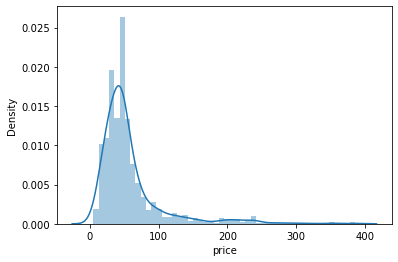

In [103]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedroom_count', ylabel='Density'>

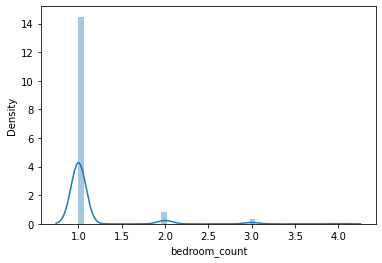

In [104]:
sns.distplot(df['bedroom_count'])

<AxesSubplot:xlabel='bed_count', ylabel='Density'>

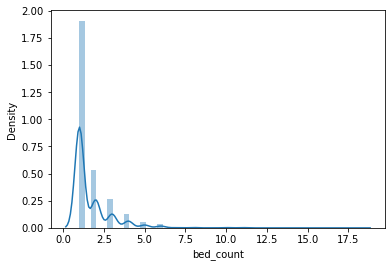

In [105]:
sns.distplot(df['bed_count'])

In [106]:
q = df['bed_count'].quantile(0.99)
df = df[df['bed_count']<q]

<AxesSubplot:xlabel='bed_count', ylabel='Density'>

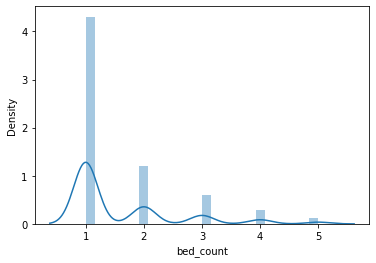

In [107]:
sns.distplot(df['bed_count'])

<AxesSubplot:xlabel='review_count', ylabel='Density'>

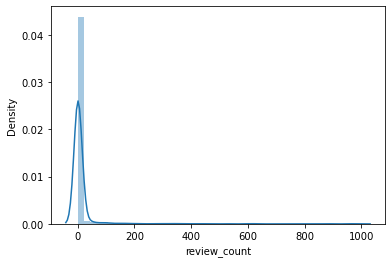

In [108]:
sns.distplot(df['review_count'])

In [109]:
q = df['review_count'].quantile(0.99)
df = df[df['review_count']<q]

<AxesSubplot:xlabel='review_count', ylabel='Density'>

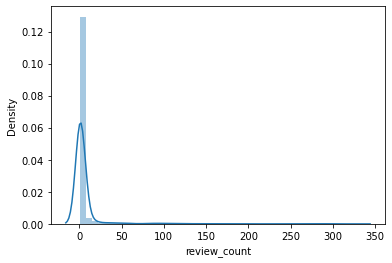

In [110]:
sns.distplot(df['review_count'])

In [111]:
df.describe()

,price,bedroom_count,bed_count,review_count
count,2155.000000,2155.000000,2155.000000,2155.000000
mean,56.170302,1.077958,1.574942,6.412065
std,46.571849,0.323128,0.962299,26.611341
min,5.000000,1.000000,1.000000,1.000000
25%,31.000000,1.000000,1.000000,1.000000
50%,45.000000,1.000000,1.000000,1.000000
75%,59.500000,1.000000,2.000000,1.000000
max,386.000000,4.000000,5.000000,327.000000


## find duplicates

In [112]:
df[df.duplicated()]

,price,bedroom_count,bed_count,review_count
20,45.0,1.0,1.0,1.0
26,43.0,1.0,1.0,1.0
27,43.0,1.0,1.0,1.0
30,45.0,1.0,1.0,1.0
35,45.0,1.0,1.0,1.0
...,...,...,...,...
2242,49.0,1.0,1.0,1.0
2243,45.0,1.0,1.0,1.0
2244,56.0,1.0,1.0,1.0
2245,106.0,1.0,1.0,1.0


In [113]:
df.shape

(2155, 4)

In [114]:
df.drop_duplicates()

,price,bedroom_count,bed_count,review_count
1,35.0,1.0,1.0,1.0
2,42.0,1.0,3.0,196.0
3,32.0,1.0,1.0,1.0
4,73.0,1.0,3.0,16.0
6,45.0,1.0,1.0,1.0
...,...,...,...,...
2193,89.0,1.0,1.0,1.0
2204,198.0,1.0,3.0,1.0
2228,178.0,1.0,3.0,1.0
2239,208.0,1.0,1.0,1.0


In [115]:
df.shape

(2155, 4)

In [116]:
df.sample(10)

,price,bedroom_count,bed_count,review_count
464,45.0,1.0,1.0,1.0
413,18.0,1.0,1.0,1.0
1078,71.0,2.0,2.0,7.0
959,65.0,1.0,2.0,1.0
396,25.0,1.0,1.0,1.0
2055,45.0,1.0,1.0,1.0
2222,55.0,1.0,1.0,1.0
1500,104.0,2.0,2.0,1.0
1484,52.0,1.0,1.0,1.0
528,77.0,1.0,1.0,78.0


In [117]:
df['bedroom_count'].value_counts()

1.0    2020
2.0     104
3.0      29
4.0       2
Name: bedroom_count, dtype: int64

In [118]:
common_bedroom_count = df.groupby(['bedroom_count']).size().reset_index(name='counts')
common_bedroom_count

,bedroom_count,counts
0,1.0,2020
1,2.0,104
2,3.0,29
3,4.0,2


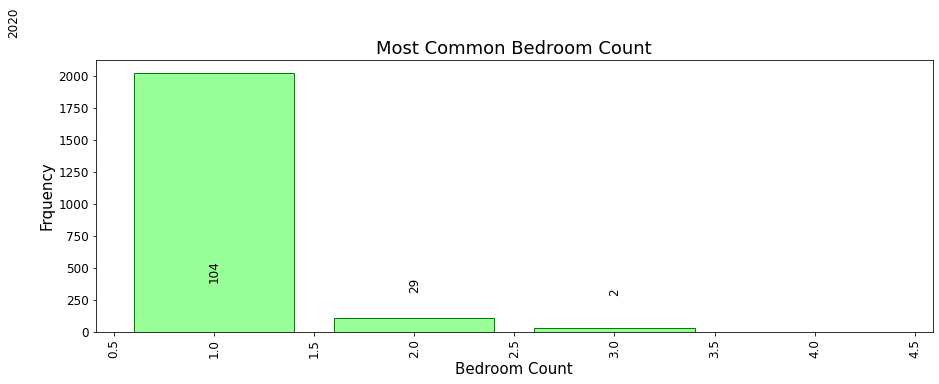

In [119]:
plt.figure(figsize = (15,5)) 
plt.title("Most Common Bedroom Count", fontsize=18) 
plt.bar(common_bedroom_count["bedroom_count"], common_bedroom_count["counts"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Bedroom Count",fontsize=15) 
plt.ylabel("Frquency",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in common_bedroom_count["counts"].items(): 
        plt.text(k,v+300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [120]:
df['bed_count'].value_counts()

1.0    1430
2.0     390
3.0     197
4.0      97
5.0      41
Name: bed_count, dtype: int64

In [121]:
common_bed_count = df.groupby(['bed_count']).size().reset_index(name='counts')
common_bed_count

,bed_count,counts
0,1.0,1430
1,2.0,390
2,3.0,197
3,4.0,97
4,5.0,41


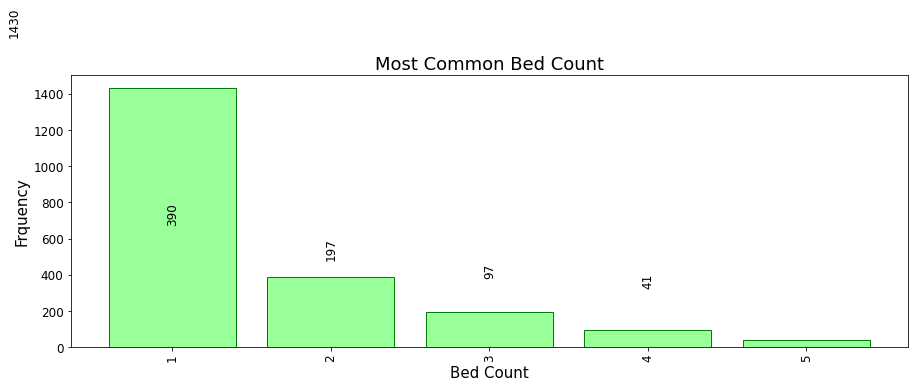

In [122]:
plt.figure(figsize = (15,5)) 
plt.title("Most Common Bed Count", fontsize=18) 
plt.bar(common_bed_count["bed_count"], common_bed_count["counts"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Bed Count",fontsize=15) 
plt.ylabel("Frquency",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in common_bed_count["counts"].items(): 
        plt.text(k,v+300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

In [123]:
df['review_count'].value_counts()

1.0      1827
2.0        39
3.0        32
4.0        28
6.0        16
         ... 
37.0        1
152.0       1
47.0        1
243.0       1
54.0        1
Name: review_count, Length: 101, dtype: int64

In [124]:
common_reviews = df.groupby(['review_count']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(15)
common_reviews

,review_count,counts
0,1.0,1827
1,2.0,39
2,3.0,32
3,4.0,28
5,6.0,16
12,13.0,13
4,5.0,12
6,7.0,11
14,15.0,9
7,8.0,8


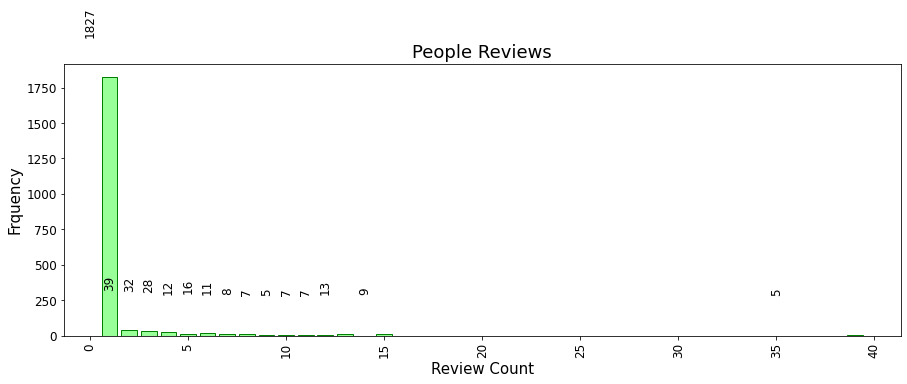

In [125]:
plt.figure(figsize = (15,5)) 
plt.title("People Reviews", fontsize=18) 
plt.bar(common_reviews["review_count"], common_reviews["counts"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Review Count",fontsize=15) 
plt.ylabel("Frquency",fontsize=15) 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in common_reviews["counts"].items(): 
        plt.text(k,v+300,str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

## Linear Regression

In [126]:
df.head()

,price,bedroom_count,bed_count,review_count
1,35.0,1.0,1.0,1.0
2,42.0,1.0,3.0,196.0
3,32.0,1.0,1.0,1.0
4,73.0,1.0,3.0,16.0
6,45.0,1.0,1.0,1.0


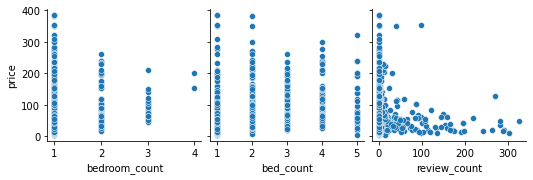

In [127]:
sns.pairplot(df,x_vars=['bedroom_count','bed_count','review_count'],y_vars='price')

In [128]:
x = df.drop(['price'],axis=1).values
y = df['price'].values

### Split Dataset [training - test]

In [129]:
# divid into train and test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [130]:
# Scalers 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Train Model

In [131]:
my_model = LinearRegression()
my_model.fit(x_train , y_train)

LinearRegression()

In [132]:
my_model.coef_

array([ 1.38440873, 19.87494348, -0.13621779])

In [133]:
my_model.intercept_

24.56755895588908

## Predict Value

In [134]:
# predicated Value
y_predict = my_model.predict(x_test[:5])
y_predict

array([ 83.80596685,  45.69069338, 100.13924775,  65.56563686,
        65.15698349])

In [135]:
# real value
y_test[:5]

array([34., 13., 33., 24., 35.])

### Regression Score

In [136]:
train_data_score = my_model.score(x_train , y_train) 
test_data_score = my_model.score(x_test,y_test)

print(train_data_score)
print(test_data_score)

0.16610041434737688
0.15214629590536244


## Evaluate 

In [137]:
from sklearn.metrics import r2_score
y_pred = my_model.predict(x_test)
r2_score(y_test , y_pred)

0.15214629590536244

Text(0, 0.5, 'Predicted Data')

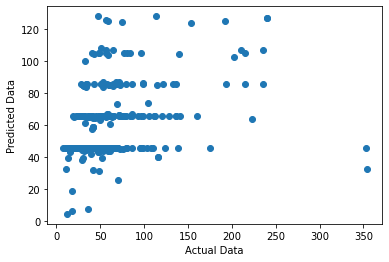

In [138]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

-----------------------
## Ploynomial

In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

poly_model = LinearRegression()

In [140]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [141]:
poly_test=poly_model.score(X_test_poly, y_test)
poly_train=poly_model.score(X_train_poly, y_train)

print(f'train R^2 is: {poly_train}')
print(f'train R^2 is: {poly_test}')

train R^2 is: 0.18650062207541573
train R^2 is: 0.1339471778391298


------
## Ridge

In [142]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, Lasso

rl = Ridge(alpha=1)
rl.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [143]:
rl_train = rl.score(X_train_scaled, y_train)
rl_test = rl.score(X_test_scaled, y_test)

print(f' train R^2 is: {rl_train}')
print(f' test R^2 is: {rl_test}')

 train R^2 is: 0.1661003413638893
 test R^2 is: 0.15220096300216435


------
## Lasso 

In [103]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std

lasso_model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lasso_model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 19.428 (1.276)


In [106]:
lasso_model.fit(x, y)

Lasso()

In [107]:
train_data_score_ls = lasso_model.score(x_train , y_train)
test_data_score_ls = lasso_model.score(x_test , y_test)

print(f' train R^2 is: {train_data_score_ls}')
print(f' test R^2 is: {test_data_score_ls}')

 train R^2 is: 0.1848473521528491
 test R^2 is: 0.17790462644093008


---
## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [110]:
y_predict_dt = DT_model.predict(x_test[:5])
y_predict_dt

array([63.9665272, 42.3797942, 42.3797942, 42.3797942, 42.3797942])

In [111]:
y_test[:5]

array([136., 175.,  47.,  39.,  30.])

In [112]:
## Score
train_data_score_dt = DT_model.score(x_train , y_train)
test_data_score_dt = DT_model.score(x_test , y_test)


print(f' train R^2 is: {train_data_score_dt}')
print(f' test R^2 is: {test_data_score_dt}')

 train R^2 is: 0.21534637422620184
 test R^2 is: 0.16436764916139346
